In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Seattle Airbnb listings dataset
file_path = 'listings_seatle.csv'
df_seatle = pd.read_csv(file_path)

In [3]:
# Select relevant columns
df_seatle = df_seatle[[
    "id", "name", "host_location", "host_response_time", "host_response_rate", 
    "host_acceptance_rate", "host_is_superhost", "host_has_profile_pic", 
    "host_identity_verified", "price", "review_scores_rating"
]]

In [4]:
# Display the number of missing values for each column
print(df_seatle.isna().sum())

id                          0
name                        0
host_location               8
host_response_time        523
host_response_rate        523
host_acceptance_rate      773
host_is_superhost           2
host_has_profile_pic        2
host_identity_verified      2
price                       0
review_scores_rating      647
dtype: int64


In [5]:
# Drop rows with any missing values to ensure data quality
df_seatle = df_seatle.dropna()

In [6]:
# Display DataFrame information
df_seatle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2678 entries, 0 to 3814
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2678 non-null   int64  
 1   name                    2678 non-null   object 
 2   host_location           2678 non-null   object 
 3   host_response_time      2678 non-null   object 
 4   host_response_rate      2678 non-null   object 
 5   host_acceptance_rate    2678 non-null   object 
 6   host_is_superhost       2678 non-null   object 
 7   host_has_profile_pic    2678 non-null   object 
 8   host_identity_verified  2678 non-null   object 
 9   price                   2678 non-null   object 
 10  review_scores_rating    2678 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 251.1+ KB


In [7]:
# Convert percentage columns to float
df_seatle['host_response_rate'] = df_seatle['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df_seatle['host_acceptance_rate'] = df_seatle['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0


In [8]:
# Convert 't' and 'f' strings to boolean values
df_seatle['host_is_superhost'] = df_seatle['host_is_superhost'].replace({'t': True, 'f': False}).astype('bool')
df_seatle['host_has_profile_pic'] = df_seatle['host_has_profile_pic'].replace({'t': True, 'f': False}).astype('bool')
df_seatle['host_identity_verified'] = df_seatle['host_identity_verified'].replace({'t': True, 'f': False}).astype('bool')


In [9]:
# Select columns of interest for correlation analysis
selected_columns = [
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
    'host_has_profile_pic', 'host_identity_verified', 'review_scores_rating'
]

In [10]:
# Create a new DataFrame with selected columns
df_selected = df_seatle[selected_columns]

In [11]:
# Compute the correlation matrix
correlation_matrix = df_selected.corr()

In [12]:
# Display the correlation of review_scores_rating with other variables
print(correlation_matrix['review_scores_rating'])

host_response_rate        0.159508
host_acceptance_rate     -0.016287
host_is_superhost         0.261081
host_has_profile_pic     -0.017855
host_identity_verified    0.077732
review_scores_rating      1.000000
Name: review_scores_rating, dtype: float64


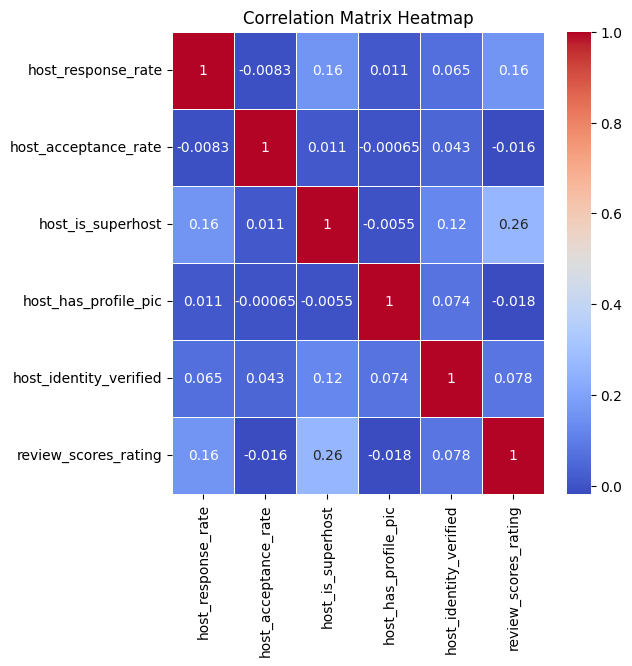

In [13]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
# Convert price column to numeric format
df_seatle['price'] = df_seatle['price'].str.replace('$', '').str.replace(',', '').astype('float')


In [15]:
# Add price to the selected columns for further analysis
selected_columns.append('price')


In [16]:
# Create a new DataFrame with the updated selected columns
df_selected = df_seatle[selected_columns]

In [17]:
# Compute the updated correlation matrix
correlation_matrix = df_selected.corr()
print(correlation_matrix)

                        host_response_rate  host_acceptance_rate  \
host_response_rate                1.000000             -0.008278   
host_acceptance_rate             -0.008278              1.000000   
host_is_superhost                 0.157959              0.011487   
host_has_profile_pic              0.011308             -0.000647   
host_identity_verified            0.064672              0.042891   
review_scores_rating              0.159508             -0.016287   
price                            -0.023981              0.006115   

                        host_is_superhost  host_has_profile_pic  \
host_response_rate               0.157959              0.011308   
host_acceptance_rate             0.011487             -0.000647   
host_is_superhost                1.000000             -0.005514   
host_has_profile_pic            -0.005514              1.000000   
host_identity_verified           0.124800              0.074318   
review_scores_rating             0.261081            

In [18]:
# Load Boston Airbnb listings dataset
file_path = 'listings.csv'
df_boston = pd.read_csv(file_path)

In [19]:
# Select relevant columns
df_boston = df_boston[[
    "id", "name", "host_location", "host_response_time", "host_response_rate", 
    "host_acceptance_rate", "host_is_superhost", "host_has_profile_pic", 
    "host_identity_verified", "price", "review_scores_rating"
]]


In [20]:
# Display the number of missing values for each column
print(df_boston.isna().sum())

id                          0
name                        0
host_location              11
host_response_time        471
host_response_rate        471
host_acceptance_rate      471
host_is_superhost           0
host_has_profile_pic        0
host_identity_verified      0
price                       0
review_scores_rating      813
dtype: int64


In [21]:
# Drop rows with any missing values to ensure data quality
df_boston = df_boston.dropna()

In [22]:
# Display DataFrame information
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2545 entries, 1 to 3583
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2545 non-null   int64  
 1   name                    2545 non-null   object 
 2   host_location           2545 non-null   object 
 3   host_response_time      2545 non-null   object 
 4   host_response_rate      2545 non-null   object 
 5   host_acceptance_rate    2545 non-null   object 
 6   host_is_superhost       2545 non-null   object 
 7   host_has_profile_pic    2545 non-null   object 
 8   host_identity_verified  2545 non-null   object 
 9   price                   2545 non-null   object 
 10  review_scores_rating    2545 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 238.6+ KB


In [23]:
# Convert percentage columns to float
df_boston['host_response_rate'] = df_boston['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df_boston['host_acceptance_rate'] = df_boston['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0


In [24]:
# Convert 't' and 'f' strings to boolean values
df_boston['host_is_superhost'] = df_boston['host_is_superhost'].replace({'t': True, 'f': False}).astype('bool')
df_boston['host_has_profile_pic'] = df_boston['host_has_profile_pic'].replace({'t': True, 'f': False}).astype('bool')
df_boston['host_identity_verified'] = df_boston['host_identity_verified'].replace({'t': True, 'f': False}).astype('bool')


In [25]:
# Select columns of interest for correlation analysis
selected_columns = [
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
    'host_has_profile_pic', 'host_identity_verified', 'review_scores_rating'
]

In [26]:
# Create a new DataFrame with selected columns
df_selected = df_boston[selected_columns]

In [27]:
# Compute the correlation matrix
correlation_matrix = df_selected.corr()


In [28]:
# Display the correlation of review_scores_rating with other variables
print(correlation_matrix['review_scores_rating'])

host_response_rate        0.085897
host_acceptance_rate      0.029590
host_is_superhost         0.239211
host_has_profile_pic     -0.028575
host_identity_verified    0.074953
review_scores_rating      1.000000
Name: review_scores_rating, dtype: float64


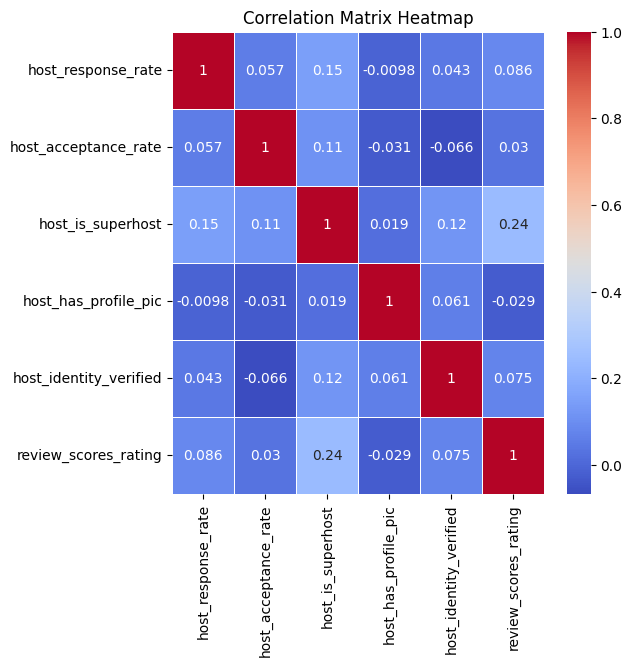

In [29]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:
# Convert price column to numeric format
df_boston['price'] = df_boston['price'].str.replace('$', '').str.replace(',', '').astype('float')


In [31]:
# Create a new DataFrame with the updated selected columns
df_selected = df_boston[selected_columns]

In [32]:
# Compute the updated correlation matrix
correlation_matrix = df_selected.corr()
print(correlation_matrix)

                        host_response_rate  host_acceptance_rate  \
host_response_rate                1.000000              0.056644   
host_acceptance_rate              0.056644              1.000000   
host_is_superhost                 0.147670              0.112479   
host_has_profile_pic             -0.009757             -0.031179   
host_identity_verified            0.042968             -0.066230   
review_scores_rating              0.085897              0.029590   

                        host_is_superhost  host_has_profile_pic  \
host_response_rate               0.147670             -0.009757   
host_acceptance_rate             0.112479             -0.031179   
host_is_superhost                1.000000              0.018846   
host_has_profile_pic             0.018846              1.000000   
host_identity_verified           0.117861              0.061383   
review_scores_rating             0.239211             -0.028575   

                        host_identity_verified  revie